In [3]:
import numpy as np
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.integrate import quad
from scipy.stats import gaussian_kde

In [139]:
# Problem 2
X = np.genfromtxt('job_right_out_of_college_X.csv', delimiter=',')
y = np.genfromtxt('job_right_out_of_college_y.csv', delimiter=',')
y = y.reshape([-1,1])

print(X.shape)
print(y.shape)

(1000, 7)
(1000, 1)


In [140]:
def preprocess(x,y):
    # 1: Scale and Center the data
    scaler = pre.MinMaxScaler(feature_range=(0, 1))
    x = scaler.fit_transform(x)
    print("x-std: ", x.std())
    print("x-mean: ", x.mean())
    
    x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=22)
    # 3: Split remaining into val (10%) and test (10%)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=22)
    y_test = y_test.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)

    print("\nX-train shape: ", x_train.shape)
    print("Y-train shape: ", y_train.shape)

    print("\nX-val shape: ", x_val.shape)
    print("Y-val shape: ", y_val.shape)

    print("\nX-test shape: ", x_test.shape)
    print("Y-test shape: ", y_test.shape)
    return x_train, y_train, x_val, y_val, x_test, y_test
x_train, y_train, x_val, y_val, x_test, y_test = preprocess(X,y)

x-std:  0.33045174584880094
x-mean:  0.5031911439963794

X-train shape:  (800, 7)
Y-train shape:  (800, 1)

X-val shape:  (100, 7)
Y-val shape:  (100, 1)

X-test shape:  (100, 7)
Y-test shape:  (100, 1)


In [141]:
# Logistic Regression
def l1_logistic_regression(x, y, u, iter, l):
    w = np.random.randn(x.shape[1]+1,1)
    def gradient(phi, x, y, w, l):
        return ((phi.T @ (sigmoid(phi @ w) - y)) / x.shape[0]) + l*np.sign(w)
    phi = np.hstack((x, np.ones((x.shape[0], 1))))
    for i in range(iter):
        grad = gradient(phi, x, y, w, l)
        w = w - u * grad
    return w

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def test_logistic_regression(x_train, y_train, x_test, y_test, l):
    
    log_weights = l1_logistic_regression(x_train, y_train, 0.001, 200000, l)
    phi = np.hstack((x_test, np.ones((x_test.shape[0], 1))))
    def q(x=None, X=None, w=None):
        if X is None:
            return 1/(1 + np.exp(-x.T.dot(w)))
        else:
            return 1/(1 + np.exp(-X.dot(w)))
    pred = []
    for x in phi:
        pred.append(np.round(q(x, None, log_weights))[0])
    lbls = np.array(pred)
    correct = 0
    for i in range(x_test.shape[0]):
        if lbls[i] == y_test[i]:
            correct += 1
        else:
            pass
    return correct/x_test.shape[0]*100, log_weights

(log_regression_accuracy, w) = test_logistic_regression(x_train, y_train, x_test, y_test, 0.5)
(log_regression_train_accuracy, _) = test_logistic_regression(x_train, y_train, x_train, y_train, 0.5)
print("Logistic Regression Test accuracy: ", log_regression_accuracy)
print("Logistic Regression Train accuracy: ", log_regression_train_accuracy)

Logistic Regression Test accuracy:  79.0
Logistic Regression Train accuracy:  30.375000000000004


In [142]:
Logistic_Regression = LogisticRegression(penalty='l1', solver='liblinear')
model = Logistic_Regression.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 100.0


In [143]:
print("Weights (coefficients):", model.coef_)
print("Bias (intercept):", model.intercept_)

Weights (coefficients): [[ 0.51038251  5.04972656 -0.33781044  6.97370155 -2.91397623 15.75124745
   6.26247582]]
Bias (intercept): [-20.09293259]


In [144]:
print("Maximum w value is: ", np.max(w))
print(w[:7])

Maximum w value is:  0.00025157520936204157
[[-1.49105609e-04]
 [-1.42282254e-04]
 [-3.41923810e-04]
 [-2.90408637e-04]
 [ 2.51575209e-04]
 [ 2.23994999e-04]
 [ 5.33773505e-05]]


The maximum value corresponds to the second to last feature of the dataset, which is economic condition. My result was significantly worse than SKlearn, which got 100% accuracy in a fraction of the time. They both agree that economic condition is the most important weight though.

In [187]:
def m(x):
    return np.exp(-(x-40000))

norm_const_m, _ = quad(m, 40000, np.inf)

def norm_m_p(x):
    return m(x) / norm_const_m


def entropy_m_p(x):
    f = norm_m_p(x)
    return f * np.log(f + 1e-12)


m_result = -quad(entropy_m_p, 40000, np.inf)[0]
print("Definite integral max:", m_result*norm_const_m)

Definite integral max: 0.999999999971735


In [184]:
def e(x):
    return (1/150000) * x

norm_const_e, _ = quad(e, 30000, 180000)

def norm_e_p(x):
    return e(x) / norm_const_e


def entropy_e_p(x):
    f = norm_e_p(x)
    return f * np.log(f)


e_result = -quad(entropy_e_p, 30000, 180000)[0]
print("Definite integral ella:", e_result*norm_const_e)

Definite integral ella: 1241961.0991886149


In [186]:
import numpy as np
from scipy.integrate import quad

mu = 30000
sig = 60000

def a(x):
    return (1 / (sig * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sig**2))

lower_range = mu - 6 * sig
upper_range = mu + 6 * sig

norm_const_a, _ = quad(a, lower_range, upper_range)

def norm_a_p(x):
    return a(x) / norm_const_a

def entropy_a_p(x):
    f = norm_a_p(x)
    f = np.clip(f, 1e-300, 1)
    return f * np.log(f)

a_result = -quad(entropy_a_p, lower_range, upper_range, epsabs=1e-10, epsrel=1e-10)[0]
print("Definite Integral Anushka:", a_result*norm_const_a)

Definite Integral Anushka: 12.421038311471557


In [4]:
def monte(lower, upper, samples, f):
    s = np.random.uniform(lower, upper, samples)
    return -((upper-lower)/samples) * np.sum(f(s)*np.log(f(s)))

In [190]:
int = monte(40000, 1000000, 100000000, m)
print("Entropy of Max's distrubution: ", int)

Entropy of Max's distrubution:  0.9978423976334351


In [191]:
int = monte(30000, 180000, 100000000, e)
print("Entropy of ella's distrubution: ", int)

Entropy of ella's distrubution:  104999.19099768814


In [193]:
int = monte(-99999999, 99999999, 100000000, a)
print("Entropy of anushka's distrubution: ", int)

Entropy of anushka's distrubution:  1.0001638474411034


The student that suffers from the most uncertainty is ella.

In [5]:
# Question 4
X = np.genfromtxt("hours_slept.csv", delimiter=',')
X = X.reshape([-1,1])
y = np.genfromtxt("how_much_is_remembered.csv", delimiter=',')
y = y.reshape([-1,1])


print(X.shape)
print(y.shape)

(100000, 1)
(100000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

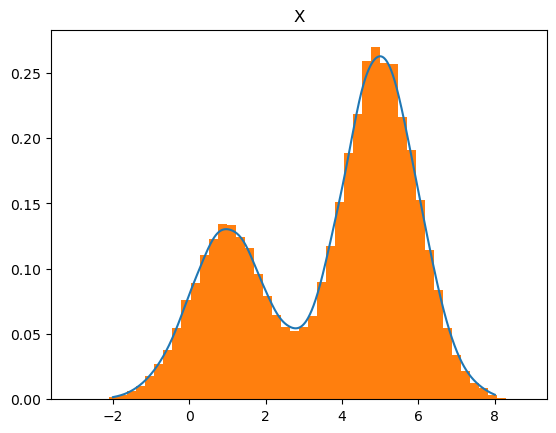

In [6]:
p_x = gaussian_kde(X.T)
x_vals = np.linspace(-2, 8, 10000)
y_vals = p_x(x_vals)

plt.figure()
plt.title("X")
plt.plot(x_vals, y_vals)
plt.hist(X, bins=50, density=True)
plt.show

In [11]:
def KL_monte(lower, upper, samples, p, q):
    s = np.random.uniform(lower, upper, samples)
    return -((upper-lower)/samples) * np.sum(p(s)*np.log(p(s)/q(s)))

In [130]:
print("Starting")
p = gaussian_kde(X.T)
X_r = X.ravel()


def find_distribution(k):
    sample = np.random.choice(X_r, size=k, replace=False)
    q = gaussian_kde(sample.T)
    return q


def integrand(x):
        return p(x) * np.log(p(x) / (q(x) + 1e-12))

KL_sample_lst = []
KL_quad_lst = []
iter = []
for i in range(1, ((100*50)+1)):
    if i % 50 == 0:
        q = find_distribution(i)
        KL = -KL_monte(-2, 8, 1000, p, q)
        KL_sample_lst.append(KL)
        iter.append(i)
        KL_quad_lst.append(quad(integrand, -2, 8)[0])
    else:
        pass

plt.plot(iter, KL_sample_lst)

Starting


KeyboardInterrupt: 

Based on this, the KL divergence flattens out after about 3000 iterations, which means 3000 samples will accurately represent the 100,000 point full data set. That is 3% of the data for theoretically the same predictive power.

In [43]:
print(KL_sample_lst)
print(KL_quad_lst)

[0.07931866260190339, 0.0538516088212095, 0.04515755105644978, 0.051933402102232774, 0.019722270130390917, 0.02735497704957009, 0.019011629124622963, 0.021444875186842804, 0.01942909342239175, 0.036715120109889886, 0.012134836591533327, 0.020619125971209098, 0.007372608313986431, 0.021184716606322544, 0.009791343053954535, 0.010122582835658943, 0.008677929906890787, 0.019937487720811775, 0.008069787058110503, 0.01088942049343925, 0.014864751887374914, 0.011102094376626112, 0.007903507985281501, 0.01273592695590767, 0.009630480300112505, 0.011745956958530113, 0.02169347609443649, 0.0339403729886127, 0.011895617163496932, 0.00591593218460127, 0.00556380253498065, 0.015166938500730545, 0.003485614457560439, 0.007141288439296576, 0.01063036269162236, 0.010059405538452392, 0.004323895895657359, 0.004794306139088699, 0.0073855918640524255, 0.005453930819816757, 0.0038958834507695555, 0.006738546058221125, 0.009321520345694568, 0.009828339855434293, 0.002682077419270091, 0.015330667519217297,

In [128]:
def cfs(x, y):
    # Append bias
    fm = np.hstack((x, np.ones((x.shape[0],1))))
    # Find closed-form solution
    weights = (np.linalg.inv((fm.T @ fm)) @ fm.T) @ y
    return weights


joined_XY = np.hstack((X, y))
idx = np.random.choice(joined_XY.shape[0], size=3, replace=False)
sampled_rows = joined_XY[idx]

N = joined_XY.shape[0]

sample_size = 3500
sample_indices = np.random.choice(np.arange(N), size=sample_size, replace=False)

rest_indices = np.setdiff1d(np.arange(N), sample_indices)

# Get the rows corresponding to the sample and the complement
sampled_rows = joined_XY[sample_indices]
not_chosen = joined_XY[rest_indices]

# Now split into X and y parts
X_sample, Y_sample = np.split(sampled_rows, [-1], axis=1)
X_rest, Y_rest = np.split(not_chosen, [-1], axis=1)
print("Sampled rows shape:", X_sample.shape, ",", Y_sample.shape)
w = cfs(X_sample, Y_sample)
X_rest = np.hstack((X_rest, np.ones((X_rest.shape[0],1))))

Sampled rows shape: (3500, 1) , (3500, 1)


In [129]:
print("W.t shape:", w.T.shape)
print("XREST SHAPE", X_rest.shape)

pred = X_rest @ w
mse = np.mean((pred - Y_rest)**2)

print("MSE:", mse)

W.t shape: (1, 2)
XREST SHAPE (96500, 2)
MSE: 0.007488245032806281


In the end, we can get away with using less than 1000 datapoints and end up with an MSE that is similar to that of 95000 datapoints. That is less than 1% of the data for the same predictive power. Nsub is 0.95%.